In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = Image.open('aragorn.jpg')

In [ ]:
img_array = np.array(img)

In [ ]:
s = 5
t = np.mean(img_array)

In [ ]:
img_gray = np.mean(img_array, axis=2).astype(np.uint8)
hist, bins = np.histogram(img_gray.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()

In [ ]:
def get_contrasted_image(alpha):
  contrasted_img = np.interp(img_array.flatten(), bins[:-1], cdf_normalized)
  contrasted_img = contrasted_img.reshape(img_array.shape)
  red, green, blue = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2]

  red = np.clip((red + s - t) * alpha + t, 0, 255)
  green = np.clip((green + s - t) * alpha + t, 0, 255)
  blue = np.clip((blue + s - t) * alpha + t, 0, 255)

  return Image.fromarray(np.uint8(np.stack([red, green, blue], axis=2)))

In [ ]:
def get_cdf(image_c):
  img_gray = np.mean(image_c, axis=2).astype(np.uint8)
  hist, bins = np.histogram(img_gray.flatten(), 255, [0, 255])
  return hist.cumsum()

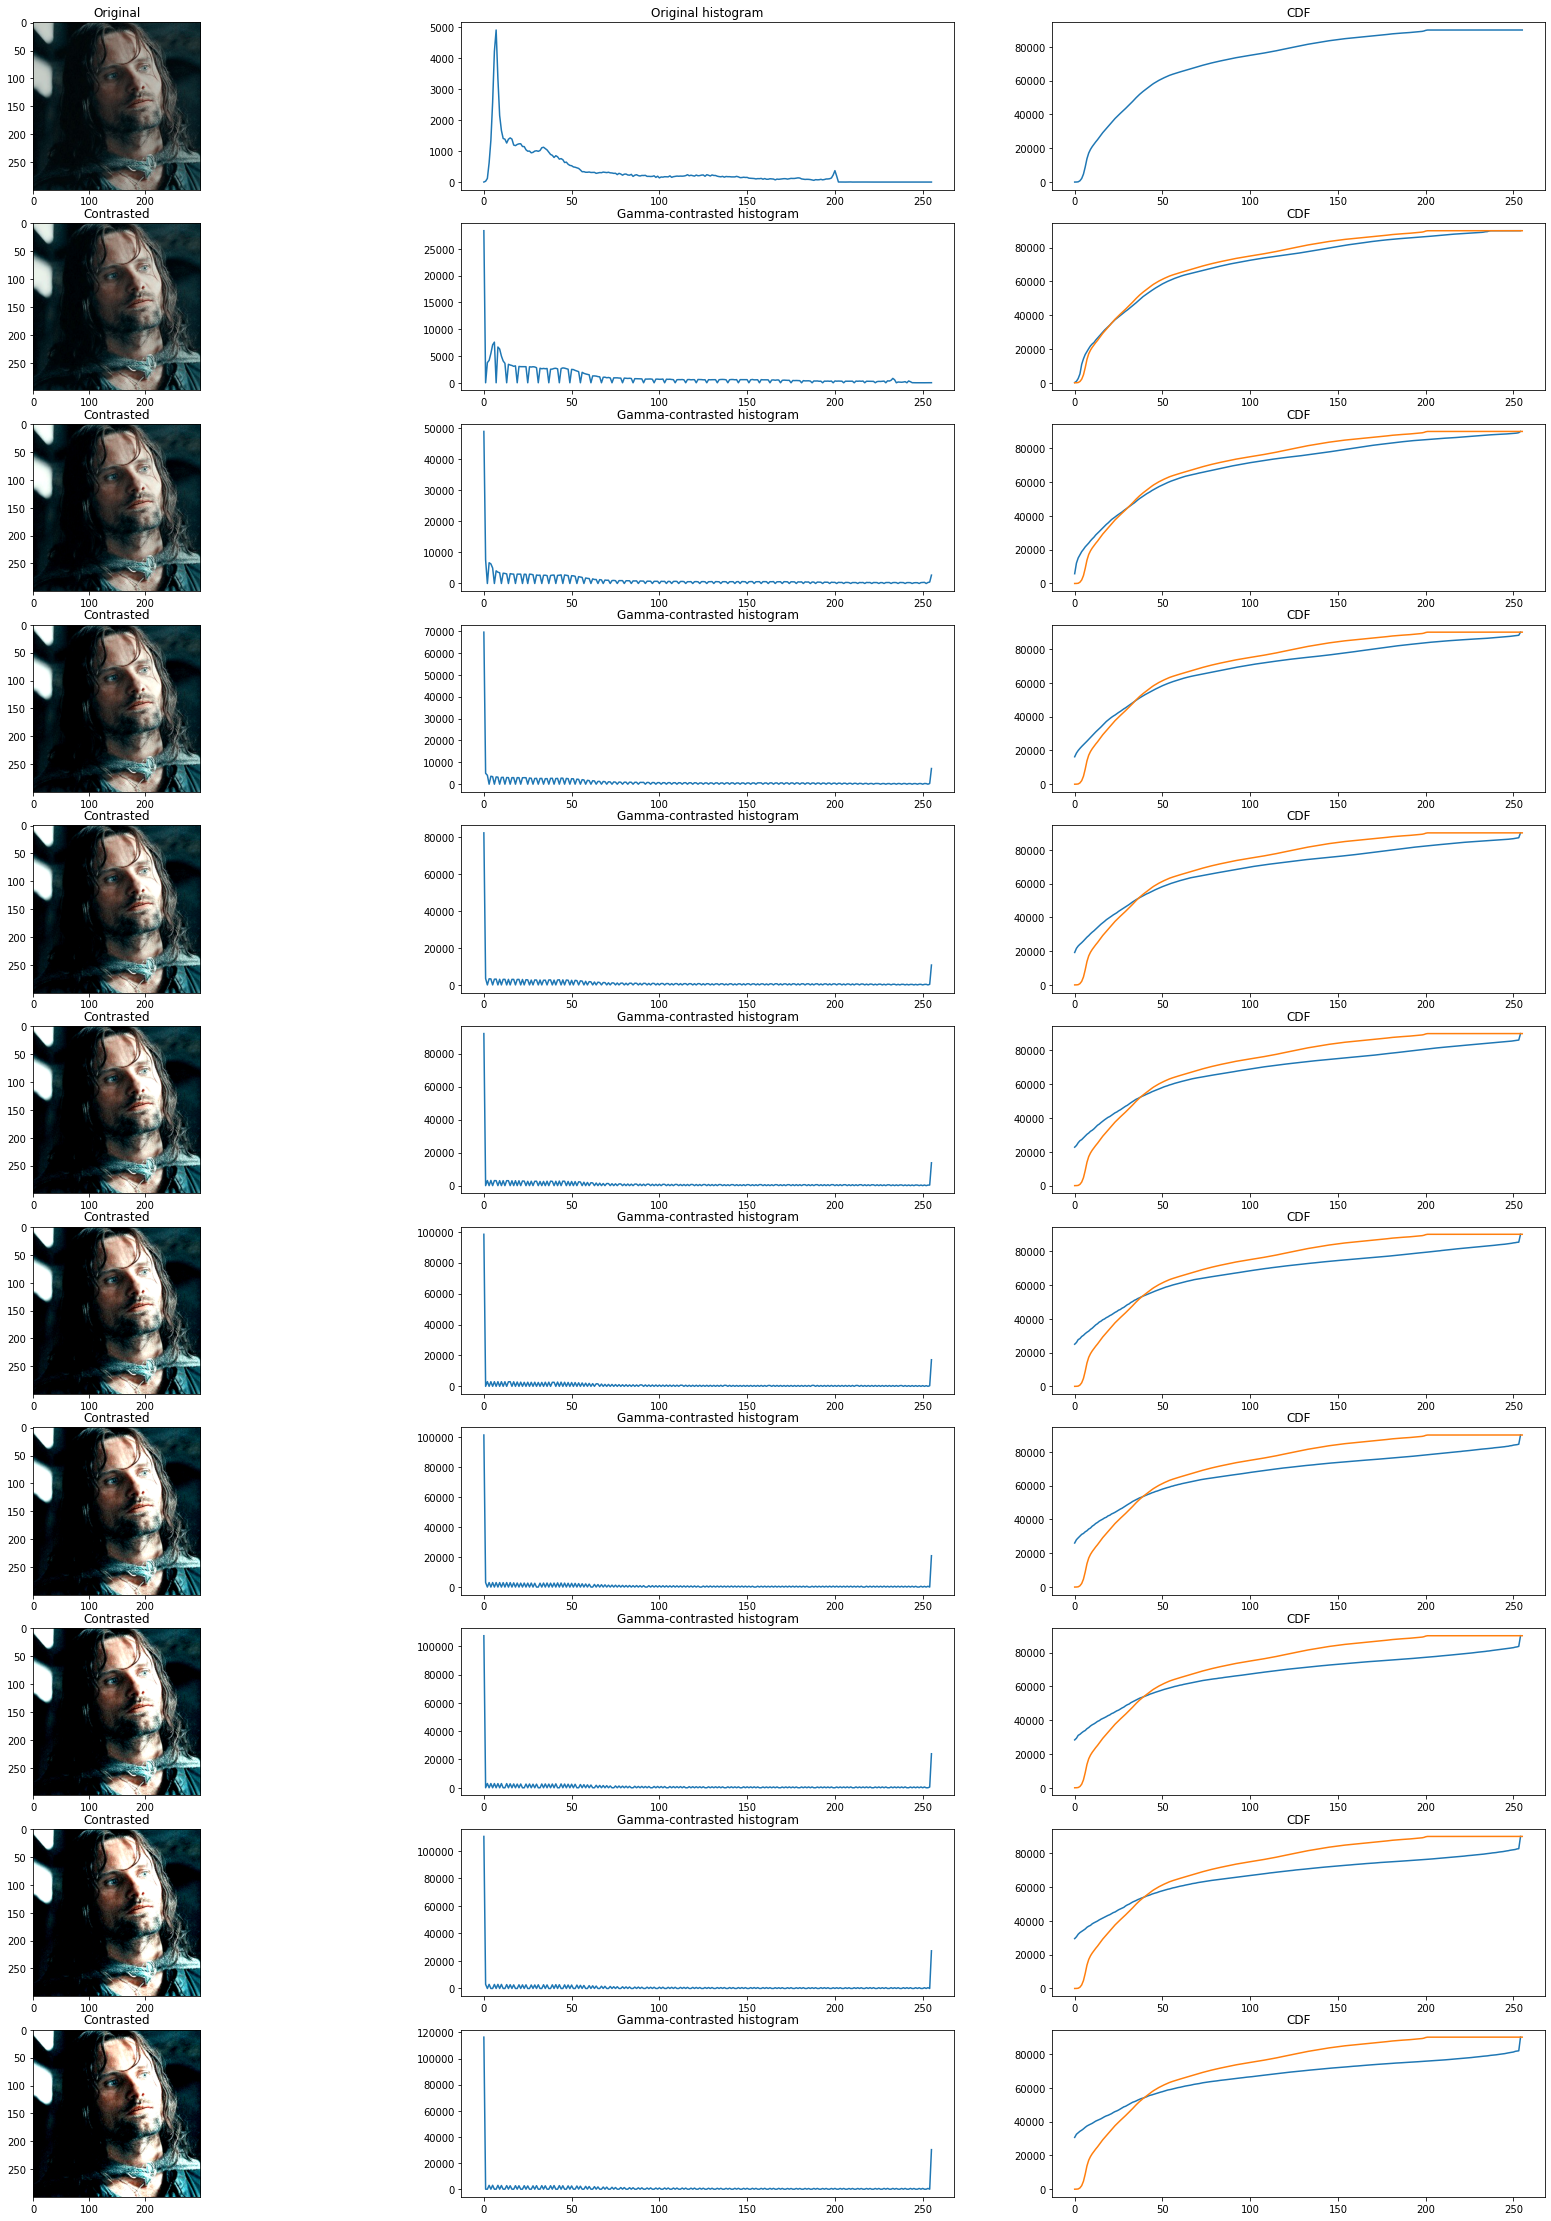

In [ ]:
fig, axes = plt.subplots(11, 3, figsize=(30,40))

axes[0][0].imshow(img)
axes[0][0].set_title('Original')
axes[0][1].plot(hist)
axes[0][1].set_title('Original histogram')
axes[0][2].plot(cdf)
axes[0][2].set_title('CDF')

for index, a in enumerate(np.linspace(1.2, 2.5, num=10), start=1):
    contrasted_img = get_contrasted_image(a)
    axes[index][0].imshow(contrasted_img)
    axes[index][0].set_title('Contrasted')
    axes[index][1].plot(np.histogram(np.array(contrasted_img).ravel(), 256, [0, 256])[0])
    axes[index][1].set_title('Gamma-contrasted histogram')
    axes[index][2].plot(get_cdf(contrasted_img))
    axes[index][2].plot(cdf)
    axes[index][2].set_title('CDF')

plt.show()